In [1]:

from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn import datasets as ds
from sklearn import model_selection
import numpy as np
import matplotlib as mp
import jupyter
import math
import matplotlib.pyplot as plt
from math import exp,log
import random
from random import randint

mem = Memory("./mycache")

@mem.cache
def get_data(mysvmlightfile):
    data = load_svmlight_file(mysvmlightfile)
    return data[0], data[1]
x_train,y_train=get_data('a9a.txt')


x_train=x_train.toarray()
x_train=np.hstack((x_train,np.ones([np.shape(x_train)[0],1])))
y_train=y_train.reshape(np.shape(y_train)[0],1)
x_test,y_test=ds.load_svmlight_file("a9a.t",n_features=123)
x_test=x_test.toarray()
x_test=np.hstack((x_test,np.ones([np.shape(x_test)[0],1])))
y_test=y_test.reshape(np.shape(y_test)[0],1)

n=np.shape(x_train)[0]
m=np.shape(x_train)[1]


def loss(X,Y,W):
    n,m=X.shape
    l=0
    for i in range(n):
        l=l+math.log((1+exp(-Y[i]*W.T.dot(X[i]))),math.e)
    return l/n


def gradient(X,Y,W):
    n,m=X.shape
    g=0
    for i in range(n):
        g-=Y[i]*X[i]/(1+exp(Y[i]*W.T.dot(X[i])))
    g=(g/n).reshape((g.shape[0],1))
    return g

#初始化NAG
W_NAG=np.zeros((m,1))
L_NAG=[]
eta_NAG=0.1
gamma_NAG=0.1
batch_NAG=100
v=0
#初始化RMS
W_RMS=np.zeros((m,1))
L_RMSProp=[]
eta_RMS=0.01
gamma_RMS=0.9
epsilon_RMS=1e-3
batch_RMS=100
G=0
#初始化AdaDelta
W_ADA=np.zeros((m,1))
L_AdaDelta=[]
gamma_ADA=0.9
epsilon_ADA=1e-6
batch_ADA=100
GG=0
dt=0
#初始化adam
W_ADAM=np.zeros((m,1))
L_Adam=[]
beta_ADAM=0.9
gamma_ADAM=0.99
eta_ADAM=0.001
epsilon_ADAM=1e-8
batch_ADAM=100
M=0
# training nag
for epoch in range(300):
    random.seed()
    i=randint(0,n-1-batch_NAG)
    g=gradient(x_train[i:i+batch_NAG].reshape((batch_NAG,m)),y_train[i:i+batch_NAG].reshape((batch_NAG,1)),W_NAG-gamma_NAG*v)
    v=gamma_NAG*v+eta_NAG*g
    W_NAG=W_NAG-v
    l_test=loss(x_test,y_test,W_NAG)
    L_NAG.append(l_test)
print("L_NAG")
print(L_NAG) 

# training rmsprop
for epoch in range(300):
    random.seed()
    i=randint(0,n-1-batch_RMS)
    g=gradient(x_train[i:i+batch_RMS].reshape((batch_RMS,m)),y_train[i:i+batch_RMS].reshape((batch_RMS,1)),W_RMS)
    G=gamma_RMS*G+(1-gamma_RMS)*(g*g)
    W_RMS=W_RMS-eta_RMS/np.sqrt(G+epsilon_RMS)*g
    l_test=loss(x_test,y_test,W_RMS)
    L_RMSProp.append(l_test)
print("L_RMSProp") 
print(L_RMSProp) 

# training adadelta
for epoch in range(300):
    random.seed()
    i=randint(0,n-1-batch_ADA)
    g=gradient(x_train[i:i+batch_ADA].reshape((batch_ADA,m)),y_train[i:i+batch_ADA].reshape((batch_ADA,1)),W_ADA)
    GG=gamma_ADA*GG+(1-gamma_ADA)*g*g
    dw=-np.sqrt(dt+epsilon_ADA)/np.sqrt(GG+epsilon_ADA)*g
    W_ADA=W_ADA+dw
    dt=gamma_ADA*dt+(1-gamma_ADA)*dw*dw
    l_test=loss(x_test,y_test,W_ADA)
    L_AdaDelta.append(l_test)
print("L_AdaDelta") 
print(L_AdaDelta) 

# training adam
for epoch in range(300):
    i=randint(0,n-1-batch_ADAM)
    g=gradient(x_train[i:i+batch_ADAM].reshape((batch_ADAM,m)),y_train[i:i+batch_ADAM].reshape((batch_ADAM,1)),W_ADAM)
    M=beta_ADAM*M+(1-beta_ADAM)*g
    G=gamma_ADAM*G+(1-gamma_ADAM)*g*g
    alpha=eta_ADAM*np.sqrt(1-math.pow(gamma_ADAM,epoch))/(1-beta_ADAM)
    W_ADAM=W_ADAM-alpha*M/np.sqrt(G+epsilon_ADAM)
    l_test=loss(x_test,y_test,W_ADAM)
    L_Adam.append(l_test)
print("L_Adam") 
print(L_Adam) 




L_NAG
[0.646916048588625, 0.6158116032401125, 0.583636336770395, 0.565861295629207, 0.5527935422035173, 0.5422142061689675, 0.5355347731421214, 0.5272276110985363, 0.5196280519186431, 0.5132596343854122, 0.5049444841995833, 0.5003205226495077, 0.4960784439819586, 0.4931231484373501, 0.489130010769562, 0.48548965146241746, 0.484128609394879, 0.479369190307451, 0.4760065018764276, 0.4732761477063072, 0.47003186501088556, 0.46768409449569254, 0.4649260870558276, 0.4621920322738736, 0.4600507368237145, 0.4575687078995455, 0.4552065400222955, 0.452833135206401, 0.4504825957482556, 0.44869412631936195, 0.4479745918743885, 0.4460136369691604, 0.44378378262274204, 0.4416017775327097, 0.43962045940201494, 0.43789197888480014, 0.4363628001881568, 0.4349964170007834, 0.4331044359578239, 0.4317294489221775, 0.43061887741917315, 0.428998988215879, 0.42714804707326276, 0.4261071198580053, 0.42455376374387277, 0.4234843655551439, 0.4224281668696966, 0.4221036774825716, 0.4206610913195366, 0.419770688

L_AdaDelta
[0.6813079298427683, 0.6701077046886575, 0.658932403445573, 0.6485035432115694, 0.6372212819112226, 0.6270926822259755, 0.6187324901100101, 0.6108412498379385, 0.6047042310943106, 0.5966328125025024, 0.5898987865951976, 0.584820480894609, 0.5794438318741516, 0.5746471775675184, 0.57006417971403, 0.5644863790454019, 0.5595696556130219, 0.5547790048223332, 0.5510526072822122, 0.5472913640538687, 0.5435890737985601, 0.539699751807706, 0.5360837409398833, 0.5326199678972243, 0.5293746309188271, 0.5269024890204728, 0.5242775073581267, 0.5209213778679781, 0.5179035184705739, 0.5141787682445995, 0.5117765086523437, 0.5091405344439192, 0.5064806100106882, 0.5039059735600782, 0.5017293057409123, 0.4990674739130735, 0.49691658751373, 0.49478531560433897, 0.4923903385537567, 0.4901981295659767, 0.48810068863043604, 0.4863826734109852, 0.48386324899888666, 0.48187670396055515, 0.4800355830474544, 0.4781971873298157, 0.47594590245759144, 0.4742412119565215, 0.4721965280533322, 0.47009561

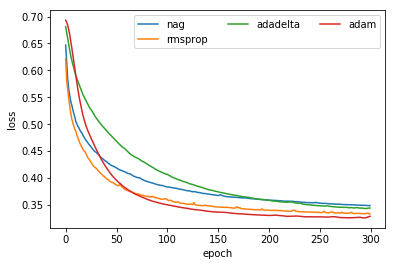

In [2]:
plt.xlabel('epoch')
plt.ylabel('loss')
time_list=[i for i in range(300)]
line1=plt.plot(time_list,L_NAG)
line2=plt.plot(time_list,L_RMSProp)
line3=plt.plot(time_list,L_AdaDelta)
line4=plt.plot(time_list,L_Adam)
label = ["nag","rmsprop","adadelta","adam"]
plt.legend(label, loc = 0, ncol = 3)
plt.show()